In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
# Import Python Libraries
import numpy as np
import glob
import os,sys
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM
import logging 
acpc_workspace='/group_workspaces/jasmin2/acpc'
#sys.path.append(os.path.join(acpc_workspace,'houston_deep_convection/Intercomparison/acpc_intercomparison'))
sys.path.append('/home/users/pmarinescu/acpc_intercomparison')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)




In [18]:
#Set models and cases to process:

models=[]
models.append('COSMO_KIT')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

modelnames=[]
modelnames.append('COSMO')
modelnames.append('MesoNH')
modelnames.append('RAMS')
modelnames.append('UM')
modelnames.append('NU-WRF')
modelnames.append('WRF-Morr')
modelnames.append('WRF-SBM')



logging.info(f'Running script for models {models}')

cases=[]
cases.append('CLN')
#cases.append('POL')

logging.info(f'Running script for cases {cases}')

In [19]:
# Create Blank Dictionary Items to Store Filenames
files=OrderedDict()
dx='500m'
dt='5m'
files['CLN']=OrderedDict()
files['CLN'][dx]=OrderedDict()
files['CLN'][dx][dt]=OrderedDict()
files['POL']=OrderedDict()
files['POL'][dx]=OrderedDict()
files['POL'][dx][dt]=OrderedDict()

In [20]:
for model in models:
    for case in cases:

        print(directory[case][dx][dt][model])
        
        files[case][dx][dt][model]=glob.glob(os.path.join(directory[case][dx][dt][model],filename[dx][dt][model]))
        files[case][dx][dt][model]=sorted(files[case][dx][dt][model])

logging.info(f'filenames set up for all models and cases')

/group_workspaces/jasmin2/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m
/group_workspaces/jasmin2/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/
/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3
/group_workspaces/jasmin2/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m
/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03
/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03
/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03


In [21]:
#Set filename to StageIV Data
from netCDF4 import Dataset
filename = '/group_workspaces/jasmin2/acpc/houston_deep_convection/Stage4/Stage4.nc'
# Create Blank Dictionary Items to Store Filenamesd
data = Dataset(filename)
precip_hr = data.variables['precipitation'][:]
precip_cum = np.nancumsum(precip_hr,axis=2)
lat_st4 = data.variables['latitude'][:]
lon_st4 = data.variables['longitude'][:]
time_st4 = data.variables['time'][:]

In [22]:
import matplotlib
#matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
temp_cmap = plt.cm.get_cmap('jet', 256)
newcolors = temp_cmap(np.linspace(0, 1, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:5, :] = white
newcmp = ListedColormap(newcolors)

COSMO_KIT CLN 36 0
/group_workspaces/jasmin2/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00070000.nc_5min
2013-06-19 19:00:00
MesoNH_Toulouse CLN 36 1
/group_workspaces/jasmin2/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-1900.nc
2013-06-19 19:00:00
RAMS_CSU CLN 36 2
/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-190000-g3.h5
2013-06-19 19:00:00
UM_LEEDS CLN 36 3
/group_workspaces/jasmin2/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_1905.nc
AccumPrecip
3
WRF_NASA CLN 36 4
/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:00:00
2013-06-19 19:00:00
WRF_OXF CLN 36 5
/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:00:00
2013-06-19 19:00:00
WRF_PNNL CLN 36 6
/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-

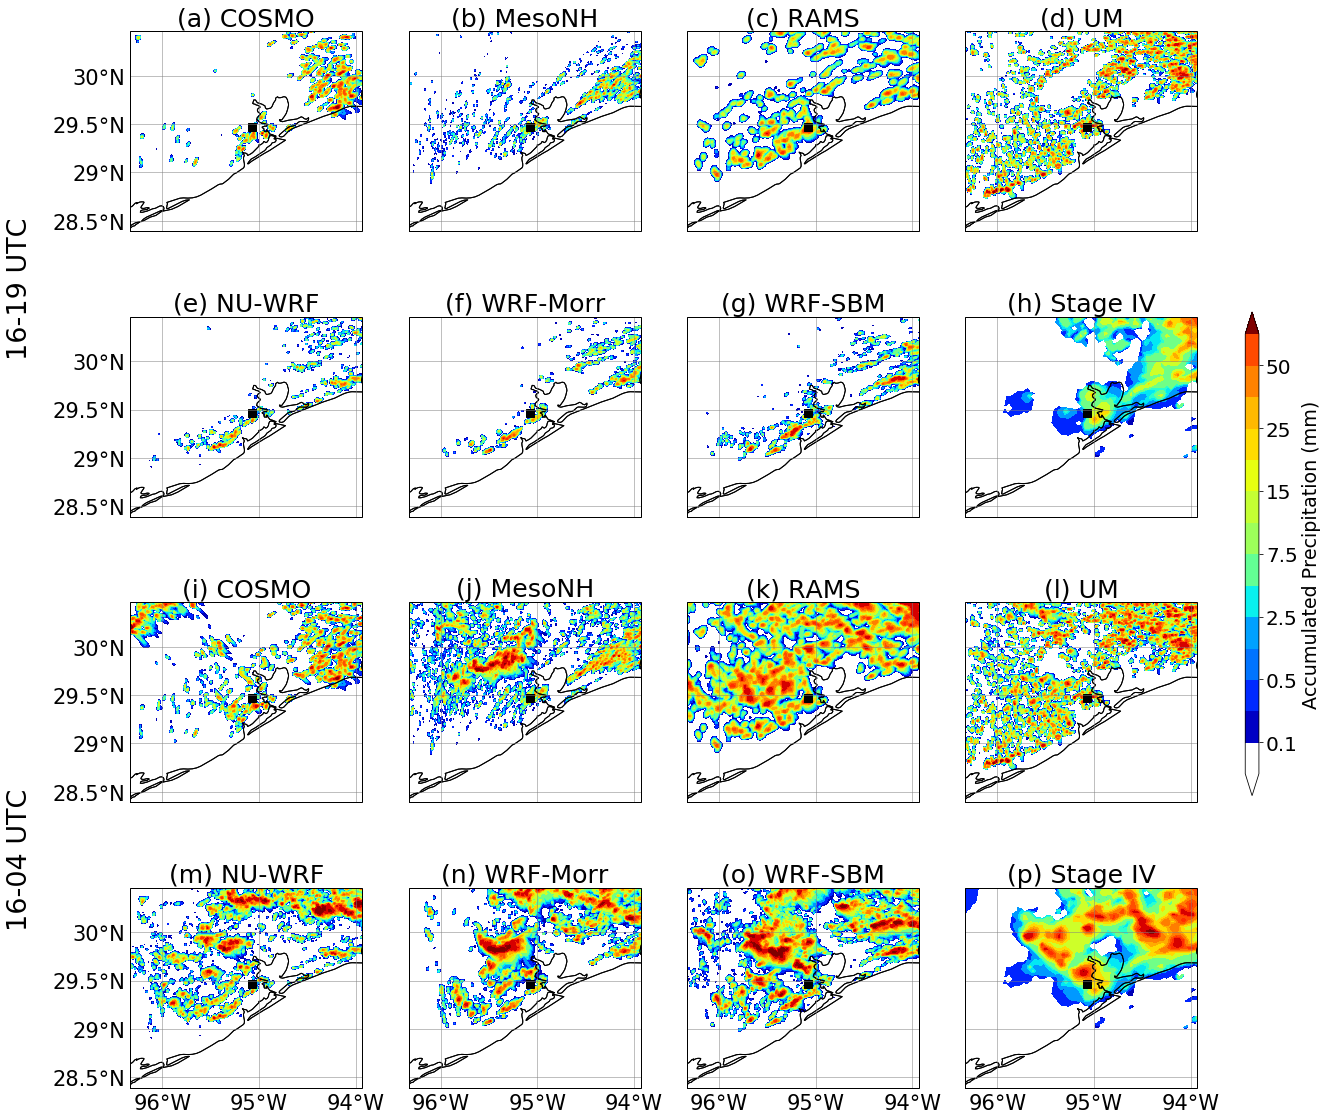

In [23]:
dx='500m'
dt='5m'
vname = 'AccumPrecip'

logging.info(f'processing dx={dx} and dt={dt}')
plotdir = '/group_workspaces/jasmin2/acpc/public/pmarin/'
filename = 'Planview_Model_StageIV_1619_1604_Revision'
os.makedirs(plotdir,exist_ok=True)

sys.setrecursionlimit(6000)
coast = NaturalEarthFeature(category='physical',scale='10m',facecolor='none',name='coastline')

pnl_lbl = ['','(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)','(o)','(p)']

plt.rcParams.update({'font.size': 21})

t_st4 = 4
ts_st4 = [7,16]

fig = plt.figure(figsize=[19,16])
ax = {}
cntm = 0
cntp = 0
cnt_t = 0
for t in [36,142]:

    if t == 36:

        clevs = [0.05,0.1,0.25,0.5,0.75,1,2.5,5,7.5,10]
        clevs2 = np.log10(clevs)
        ticks = [0.05,0.1,0.5,1,5,10]
        ticks2 = np.log10(ticks)
        ticklabels = ['0.05','0.1','0.5','1','5','10']        

        clevs = [0.05, 0.1,0.25,0.5,0.75,1,2.5,5,7.5,10,15,20,25,50,60]
        clevs2 = np.log10(clevs)
        ticks = [0.1,0.5,2.5,7.5,15,25,50]
        ticks2 = np.log10(ticks)
        ticklabels = ['0.1','0.5','2.5','7.5','15','25','50']

        
    else:
        clevs = [0.05,0.1,0.25,0.5,0.75,1,2.5,5,7.5,10,15,20,25,50,60]
        clevs2 = np.log10(clevs)
        ticks = [0.1,0.5,2.5,7.5,15,25,50]
        ticks2 = np.log10(ticks)
        ticklabels = ['0.1','0.5','2.5','7.5','15','25','50']
                
    cntm = 0
    for model in models:
        cntp = cntp + 1;
        for case in cases:        
            print(model,case,str(t),str(cntm))
            logging.info(f'start processing {model} {case}')
            
            if model == 'UM_LEEDS':
                print(files[case][dx][dt][model][t])
                var=load_variable_cube[model](files[case][dx][dt][model][:],variable_names[model][vname]) # Define Variable Name Here       
                var = var[t,:,:]
            elif model == 'MesoNH_Toulouse':
                print(files[case][dx][dt][model][t])
                var=load_variable_cube[model](files[case][dx][dt][model][t:t+1],variable_names[model][vname]) # Define Variable Name Here       
                var = var[0,:,:]
            else:
                print(files[case][dx][dt][model][t])
                var=load_variable_cube[model](files[case][dx][dt][model][t],variable_names[model][vname]) # Define Variable Name Here       

            if len(np.shape(var)) == 3:
                var = var[0,:,:]

            lat = var.coord('latitude').points
            lon = var.coord('longitude').points
            
            if model != 'UM_LEEDS':           
                cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var.coord('time').points[0])
                print(str(cur_date))

            ax[cntp] = plt.subplot(4,4,cntp, projection=ccrs.PlateCarree())

            var
            
            #feature = ax{cntm}.add_feature(coast,edgecolor='gray')
            ax[cntp].coastlines('10m')
#            a = plt.contourf(lon,lat,np.log10(var.data),levels=clevs2,transform=ccrs.PlateCarree(),extend='both',cmap=plt.cm.BuGn)
            a = plt.contourf(lon,lat,np.log10(var.data),levels=clevs2,transform=ccrs.PlateCarree(),extend='both',cmap=newcmp)
            ax[cntp].coastlines('10m')
            ax[cntp].scatter(-95.075,29.468,c='k',s=50,marker='s')
            ax[cntp].set_ylim([28.39,30.46])
            ax[cntp].set_xlim([-96.33,-93.93])
            ax[cntp].set_title(pnl_lbl[cntp]+' '+modelnames[cntm])
            gl = ax[cntp].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
            gl.xlabels_top = False
            gl.ylabels_right = False
            
            if cntp == 1 or cntp == 5 or cntp == 9 or cntp == 13:
                gl.ylabels_left = True
            else:
                gl.ylabels_left = False

                
            if cntp >= 13:
                gl.xlabels_bottom = True
            else:
                gl.xlabels_bottom = False
            
            gl.xlocator = mticker.FixedLocator([-96.33,-96, -95, -94, -93.93])
            gl.ylocator = mticker.FixedLocator([28.39,28.5, 29, 29.5, 30, 30.46])
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
        cntm = cntm + 1
        
    # Stage IV
    cntp = cntp + 1
    ax[cntp] = plt.subplot(4,4,cntp, projection=ccrs.PlateCarree())
    cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=time_st4[t_st4])
    print(str(cur_date))
    #feature = ax{cntm}.add_feature(coast,edgecolor='gray')
    ax[cntp].coastlines('10m')
#    a = plt.contourf(lon_st4,lat_st4,np.log10(precip_cum[:,:,ts_st4[cnt_t]]),levels=clevs2,transform=ccrs.PlateCarree(),extend='both',cmap=plt.cm.BuGn)
    a = plt.contourf(lon_st4,lat_st4,np.log10(precip_cum[:,:,ts_st4[cnt_t]]),levels=clevs2,transform=ccrs.PlateCarree(),extend='both',cmap=newcmp)
    ax[cntp].coastlines('10m')
    ax[cntp].scatter(-95.075,29.468,c='k',s=50,marker='s')
    ax[cntp].set_ylim([28.39,30.46])
    ax[cntp].set_xlim([-96.33,-93.93])
    ax[cntp].set_title(pnl_lbl[cntp]+' '+'Stage IV')

    gl = ax[cntp].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
          linewidth=1, color='gray', alpha=0.5, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    if cntp == 16:
        gl.xlabels_bottom = True
    gl.xlocator = mticker.FixedLocator([-96.33,-96, -95, -94, -93.93])
    gl.ylocator = mticker.FixedLocator([28.39,28.5, 29, 29.5, 30, 30.46])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    cnt_t = cnt_t + 1
    print('t = '+str(t))
    #if t == 36:
    #    cax1 = fig.add_axes([0.83, 0.525, 0.01, 0.35]) #l,b,dx,dy
    #    cbar1 = fig.colorbar(a, cax=cax1, orientation='vertical')
    #    cax1.set_ylabel('Accum. Precip. (mm)',fontsize=16)
    #    cax1.tick_params(labelsize=12) 
    #    cbar1.set_clim(np.log10(0.1),np.log10(10))                
    #    cbar1.ax.set_yticklabels(ticklabels)

#cax2 = fig.add_axes([0.83, 0.125, 0.01, 0.35]) #l,b,dx,dy
cax2 = fig.add_axes([0.935, 0.295, 0.01, 0.42]) #l,b,dx,dy
cbar2 = fig.colorbar(a, cax=cax2, orientation='vertical')
cax2.set_ylabel('Accumulated Precipitation (mm)',fontsize=19)
cax2.tick_params(labelsize=19) 
cbar2.set_clim(np.log10(0.1),np.log10(200))                
cbar2.ax.set_yticklabels(ticklabels)   
cbar2.ax.tick_params(labelsize=20)

fig.canvas.draw()
plt.subplots_adjust(right=0.90)
plt.subplots_adjust(left=0.12)
plt.subplots_adjust(top=0.975)
plt.subplots_adjust(bottom=0.025)

plt.figtext(0.03,0.78,'16-19 UTC',rotation='vertical',fontsize=27)
plt.figtext(0.03,0.285,'16-04 UTC',rotation='vertical',fontsize=27)


#fig.tight_layout()
plt.show()
fig.savefig(os.path.join(plotdir,filename)+'_v2.png')
fig.savefig(os.path.join(plotdir,filename)+'_v2.pdf')

In [24]:
print(plt.cm.gist_ncar)